In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import os
import PIL
import shutil

In [2]:
# 기본 경로
base_dir = 'C:\\vsCode\PillProject\image\shape\\'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 이미지 경로
train_circle_dir = os.path.join(train_dir, 'circle')
train_hexagon_dir = os.path.join(train_dir, 'hexagon')
train_pentagon_dir = os.path.join(train_dir, 'pentagon')
train_rectangle_dir = os.path.join(train_dir, 'rectangle')
train_rectangular_dir = os.path.join(train_dir, 'rectangular')
train_triangle_dir = os.path.join(train_dir, 'triangle')

# 검증용 이미지 경로
validation_circle_dir = os.path.join(validation_dir, 'circle')
validation_hexagon_dir = os.path.join(validation_dir, 'hexagon')
validation_pentagon_dir = os.path.join(validation_dir, 'pentagon')
validation_rectangle_dir = os.path.join(validation_dir, 'rectangle')
validation_rectangular_dir = os.path.join(validation_dir, 'rectangular')
validation_triangle_dir = os.path.join(validation_dir, 'triangle')

# 테스트용 이미지 경로
test_circle_dir = os.path.join(test_dir, 'circle')
test_hexagon_dir = os.path.join(test_dir, 'hexagon')
test_pentagon_dir = os.path.join(test_dir, 'pentagon')
test_rectangle_dir = os.path.join(test_dir, 'rectangle')
test_rectangular_dir = os.path.join(test_dir, 'rectangular')
test_triangle_dir = os.path.join(test_dir, 'triangle')

# 훈련용 이미지 파일 이름 조회
train_circle_fnames = os.listdir(train_circle_dir)
train_hexagon_fnames = os.listdir(train_hexagon_dir)
train_pentagon_fnames = os.listdir(train_pentagon_dir)
train_rectangle_fnames = os.listdir(train_rectangle_dir)
train_rectangular_fnames = os.listdir(train_rectangular_dir)
train_triangle_fnames = os.listdir(train_triangle_dir)

print('Total training circle images :', len(os.listdir(train_circle_dir)))
print('Total training hexagon images :', len(os.listdir(train_hexagon_dir)))
print('Total training pentagon images :', len(os.listdir(train_pentagon_dir)))
print('Total training rectangle images :', len(os.listdir(train_rectangle_dir)))
print('Total training rectangular images :', len(os.listdir(train_rectangular_dir)))
print('Total training triangle images :', len(os.listdir(train_triangle_dir)))

print('Total validation circle images :', len(os.listdir(validation_circle_dir)))
print('Total validation hexagon images :', len(os.listdir(validation_hexagon_dir)))
print('Total validation pentagon images :', len(os.listdir(validation_pentagon_dir)))
print('Total validation rectangle images :', len(os.listdir(validation_rectangle_dir)))
print('Total validation rectangular images :', len(os.listdir(validation_rectangular_dir)))
print('Total validation triangle images :', len(os.listdir(validation_triangle_dir)))

print('Total test circle images :', len(os.listdir(test_circle_dir)))
print('Total test hexagon images :', len(os.listdir(test_hexagon_dir)))
print('Total test pentagon images :', len(os.listdir(test_pentagon_dir)))
print('Total test rectangle images :', len(os.listdir(test_rectangle_dir)))
print('Total test rectangular images :', len(os.listdir(test_rectangular_dir)))
print('Total test triangle images :', len(os.listdir(test_triangle_dir)))

Total training circle images : 82
Total training hexagon images : 33
Total training pentagon images : 52
Total training rectangle images : 60
Total training rectangular images : 86
Total training triangle images : 43
Total validation circle images : 25
Total validation hexagon images : 11
Total validation pentagon images : 11
Total validation rectangle images : 15
Total validation rectangular images : 25
Total validation triangle images : 17
Total test circle images : 10
Total test hexagon images : 6
Total test pentagon images : 6
Total test rectangle images : 10
Total test rectangular images : 15
Total test triangle images : 10


In [3]:
# 이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_circle_pix = [os.path.join(train_circle_dir, fname) for fname in train_circle_fnames[pic_index-8:pic_index]]
next_hexagon_pix = [os.path.join(train_hexagon_dir, fname) for fname in train_hexagon_fnames[pic_index-8:pic_index]]
next_pentagon_pix = [os.path.join(train_pentagon_dir, fname) for fname in train_pentagon_fnames[pic_index-8:pic_index]]
next_rectangle_pix = [os.path.join(train_rectangle_dir, fname) for fname in train_rectangle_fnames[pic_index-8:pic_index]]
next_rectangular_pix = [os.path.join(train_rectangular_dir, fname) for fname in train_rectangular_fnames[pic_index-8:pic_index]]
next_triangle_pix = [os.path.join(train_triangle_dir, fname) for fname in train_triangle_fnames[pic_index-8:pic_index]]

<Figure size 864x864 with 0 Axes>

In [4]:
# 이미지 데이터 전처리
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
                                   rotation_range=25, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   height_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기                                   
                                   vertical_flip=True, # vertical_flip: 불리언. 인풋을 무작위로 세로로 뒤집습니다.
                                   fill_mode='nearest' # fill_mode 이미지를 회전, 이동하거나 축소할 때 생기는 공간을 채우는 방식
                                  ) 
# validation 및 test 이미지는 augmentation을 적용하지 않는다;
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255) 

In [5]:
# flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만들기
# 변환된 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=16, # 한번에 변환된 이미지 16개씩 만들어라 라는 것
#                                                     color_mode: "grayscale"과 "rbg" 중 하나. 디폴트 값: "rgb". 이미지가 1개 혹은 3개의 색깔 채널을 갖도록 변환할지 여부.
                                                    color_mode='grayscale', # 흑백 이미지 처리
# class_mode: "categorical", "binary", "sparse", "input", 혹은 None 중 하나. 디폴트 값: "categorical". 반환될 라벨 배열의 종류를 결정합니다:
# "categorical"은 2D형태의 원-핫 인코딩된 라벨입니다,
# "binary"는 1D 형태의 이진 라벨입니다, "sparse"는 1D 형태의 정수 라벨입니다,
# "input"은 인풋 이미지와 동일한 이미지입니다 (주로 자동 인코더와 함께 사용합니다).
# None의 경우, 어떤 라벨되 반환되지 않습니다 (생성자가 이미지 데이터의 배치만 만들기 때문에, model.predict_generator(), model.evaluate_generator() 등과 함께 사용하는 것이 유용합니다). 
# class_mode가 None일 경우, 제대로 작동하려면 데이터가 directory 내 하위 디렉토리에 위치해야 한다는 점을 유의하십시오.
                                                    class_mode='categorical', 
                                                    target_size=(150,150)) # target_size에 맞춰서 이미지의 크기가 조절된다
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              batch_size=4, 
                                                              color_mode='grayscale',
                                                              class_mode='categorical', 
                                                              target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  target_size=(150,150))
# 참고로, generator 생성시 batch_size x steps_per_epoch (model fit에서) <= 훈련 샘플 수 보다 작거나 같아야 한다.

Found 356 images belonging to 6 classes.
Found 104 images belonging to 6 classes.
Found 57 images belonging to 6 classes.


In [6]:
# class 확인
train_generator.class_indices

{'circle': 0,
 'hexagon': 1,
 'pentagon': 2,
 'rectangle': 3,
 'rectangular': 4,
 'triangle': 5}

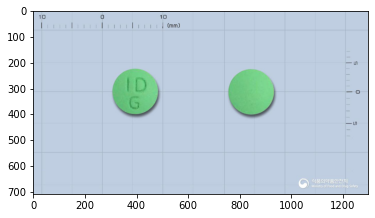

In [7]:
# 이미지 하나 불러오기
sample_img = mpimg.imread(next_circle_pix[0])
plt.imshow(sample_img)
plt.show()


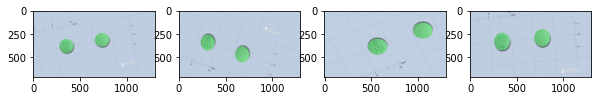

In [8]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]
# 축을 하나 추가했는데, 하나의 이미지만 바꿔주는게 아니라 동시에 여러개의 이미지를 바꿔줄 수 있기에,
# 그림 개수/장수 까지 받아서 4차원으로 (개수/장수, h, w, channel) 이렇게 받는다
# 쉽게 말해, 받는 형식이 4차원이라서 4차원 형태로 만들어 준것
plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

In [10]:
# 합성곱 신경망 모델 구성하기
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 32)      

In [13]:
from tensorflow.keras.optimizers import RMSprop

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=RMSprop(learning_rate=0.001), # 옵티마이저로는 RMSprop 사용
            #   Multi-class classification 즉 클래스가 여러 개인 다중 분류 문제에서 사용
              loss='binary_crossentropy', # 손실 함수로 categorical_crossentropy 사용
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.

In [14]:
# 모델 훈련
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

Epoch 1/100


C:\Users\rlawn\AppData\Local\Temp\ipykernel_12324\2210425463.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다


4/4 - 2s - loss: 1.0023 - accuracy: 0.6667 - val_loss: 0.4690 - val_accuracy: 0.8333 - 2s/epoch - 609ms/step
Epoch 2/100
4/4 - 2s - loss: 0.4565 - accuracy: 0.8333 - val_loss: 0.4510 - val_accuracy: 0.8333 - 2s/epoch - 380ms/step
Epoch 3/100
4/4 - 1s - loss: 0.4509 - accuracy: 0.8333 - val_loss: 0.4513 - val_accuracy: 0.8333 - 1s/epoch - 317ms/step
Epoch 4/100
4/4 - 1s - loss: 0.4513 - accuracy: 0.8333 - val_loss: 0.4528 - val_accuracy: 0.8333 - 1s/epoch - 336ms/step
Epoch 5/100
4/4 - 1s - loss: 0.4637 - accuracy: 0.8333 - val_loss: 0.5170 - val_accuracy: 0.8333 - 1s/epoch - 328ms/step
Epoch 6/100
4/4 - 1s - loss: 0.4890 - accuracy: 0.8333 - val_loss: 0.4739 - val_accuracy: 0.8333 - 1s/epoch - 290ms/step
Epoch 7/100
4/4 - 1s - loss: 0.4675 - accuracy: 0.8333 - val_loss: 0.4659 - val_accuracy: 0.8333 - 1s/epoch - 253ms/step
Epoch 8/100
4/4 - 1s - loss: 0.4681 - accuracy: 0.8333 - val_loss: 0.4736 - val_accuracy: 0.8333 - 1s/epoch - 261ms/step
Epoch 9/100
4/4 - 1s - loss: 0.4687 - accura

Epoch 67/100
4/4 - 1s - loss: 0.4545 - accuracy: 0.8333 - val_loss: 0.4562 - val_accuracy: 0.8333 - 841ms/epoch - 210ms/step
Epoch 68/100
4/4 - 1s - loss: 0.4554 - accuracy: 0.8333 - val_loss: 0.4528 - val_accuracy: 0.8333 - 889ms/epoch - 222ms/step
Epoch 69/100
4/4 - 1s - loss: 0.4529 - accuracy: 0.8333 - val_loss: 0.4530 - val_accuracy: 0.8333 - 876ms/epoch - 219ms/step
Epoch 70/100
4/4 - 1s - loss: 0.4544 - accuracy: 0.8333 - val_loss: 0.4543 - val_accuracy: 0.8333 - 988ms/epoch - 247ms/step
Epoch 71/100
4/4 - 1s - loss: 0.4544 - accuracy: 0.8333 - val_loss: 0.4535 - val_accuracy: 0.8333 - 902ms/epoch - 225ms/step
Epoch 72/100
4/4 - 1s - loss: 0.4535 - accuracy: 0.8333 - val_loss: 0.4529 - val_accuracy: 0.8333 - 877ms/epoch - 219ms/step
Epoch 73/100
4/4 - 1s - loss: 0.4541 - accuracy: 0.8333 - val_loss: 0.4541 - val_accuracy: 0.8333 - 836ms/epoch - 209ms/step
Epoch 74/100
4/4 - 1s - loss: 0.4540 - accuracy: 0.8333 - val_loss: 0.4523 - val_accuracy: 0.8333 - 815ms/epoch - 204ms/step


In [15]:
# 모델 성능 평가
model.evaluate(train_generator)

23/23 [==============================] - 3s 149ms/step - loss: 0.4522 - accuracy: 0.8333


[0.4521627426147461, 0.8333333134651184]

In [16]:
model.evaluate(validation_generator)

26/26 [==============================] - 1s 33ms/step - loss: 0.4522 - accuracy: 0.8333


[0.4521802067756653, 0.8333333730697632]

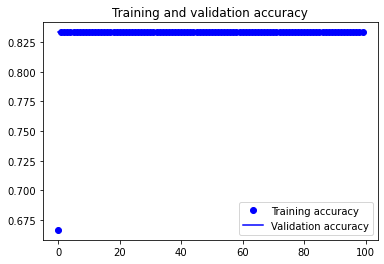

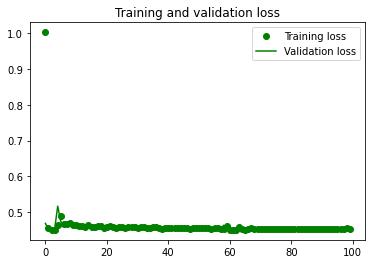

In [17]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()